In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os

In [2]:
path = os.path.dirname(os.getcwd())

In [3]:
df = pd.read_csv(path+'/data/CC2014_main.csv') # Individual probation data
df2 = pd.read_csv(path+'/data/CC2014_link.csv') # Father-children Linked data

# Figure 6 / 7. The relationship between subgroup- and population-wise $\mu$ / $\beta$
Use `df1` without aggregating, with only complete nid's. 

In [4]:
df1 = df.sort_values(by=['nid', 'gendeath']).reset_index(drop=True)

In [5]:
df1 = df1.dropna(subset=['new_wealth_july_2013'])
df1.isnull().sum()

rare_master_death_id      0
nid                      32
deathyr                   0
gendeath                 94
byr                     406
dfem                    219
decdeath                455
decbirth                966
dprob                     0
new_wealth_july_2013      0
gen_death2              346
type_aug_2013           763
dec_birth               513
father_known              0
dtype: int64

In [6]:
count = 0
count_else =0
df1_results = pd.DataFrame()
for p in range(2,6):
    for c in df1['nid'].unique():
        sub = df1[(df1['gendeath'].isin([p-1, p])) & (df1['nid'] == c )].copy()
        length = len(sub)
        # print(sub['new_wealth_july_2013'].isnull().sum())
        if length > 29: # Rule of thumb
            count += 1
            sub['time'] = pd.to_datetime(sub['gendeath'])  
            sub = sub.set_index('time')
            model = AutoReg(sub['new_wealth_july_2013'], lags=1)
            result = model.fit()
            temp_df = pd.DataFrame(result.params).T  
            temp_df['period'] = p
            temp_df['nid'] = c
            temp_df['sd'] = result.bse[0]
            df1_results = pd.concat([df1_results, temp_df], ignore_index=True)
        else:
            count_else += 1

/opt/anaconda3/envs/cc2014/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/cc2014/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/cc2014/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/cc2014/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be

In [7]:
print(count, count_else)

326 1618


In [8]:
df1_results = df1_results.sort_values(['nid', 'period']).reset_index(drop=True)
df1_results

,const,new_wealth_july_2013.L1,period,nid,sd
0,2.037938,-0.002958,3,3.0,0.569216
1,6.034427,-0.256963,2,10.0,0.924861
2,1.901335,0.161239,3,10.0,0.526426
3,1.262908,0.143288,4,10.0,0.398395
4,2.753232,-0.037003,3,14.0,0.653312
...,...,...,...,...,...
321,-0.450403,0.119937,4,1344.0,0.129016
322,-0.510255,-0.058014,5,1344.0,0.200953
323,-0.287102,0.409402,3,1345.0,0.132395
324,-0.302945,0.139096,4,1345.0,0.156174


In [9]:
df1_filtered = df1_results[df1_results['new_wealth_july_2013.L1'] >=0].reset_index(drop=True)
df1_pop = df1[df1['nid'].isin(df1_filtered['nid'].unique())].reset_index(drop=True)
print(df1_pop['nid'].nunique(), df1_filtered['nid'].nunique())

95 95


In [10]:
# Calculate population-wise estimates
df1_pop_results = pd.DataFrame()
for p in range(2,6):
    sub = df1_pop[(df1_pop['gendeath'].isin([p-1, p]))].copy()
    count += 1
    sub['time'] = pd.to_datetime(sub['gendeath'])  
    sub = sub.set_index('time')
    model = AutoReg(sub['new_wealth_july_2013'], lags=1)
    result = model.fit()
    temp_df = pd.DataFrame(result.params).T  
    temp_df['period'] = p
    temp_df['nid'] = c
    temp_df['sd'] = result.bse[0]
    df1_pop_results = pd.concat([df1_pop_results, temp_df], ignore_index=True)

/opt/anaconda3/envs/cc2014/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/cc2014/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/cc2014/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/cc2014/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_d

In [11]:
df1_pop_results

,const,new_wealth_july_2013.L1,period,nid,sd
0,1.236655,0.376813,2,NaN,0.072238
1,0.668101,0.384923,3,NaN,0.040336
2,0.442015,0.368216,4,NaN,0.029208
3,0.406922,0.224578,5,NaN,0.036276


In [12]:
# Surnames that exist for all time periods
all_period = df1_filtered.groupby('nid')['period'].apply(lambda x: all(time in x.values for time in range(2,6)))
all_period[all_period].index

Index([124.0, 141.0, 166.0, 260.0, 1153.0, 1263.0], dtype='float64', name='nid')

In [13]:
type_df = df1[['nid', 'type_aug_2013']].dropna(subset=['nid']).drop_duplicates('nid')
type_df = type_df[type_df['nid'].isin(df1_filtered['nid'])]
df1_filtered_type = pd.merge(df1_filtered, type_df, on='nid', how='left')
df1_filtered_type

,const,new_wealth_july_2013.L1,period,nid,sd,type_aug_2013
0,1.901335,0.161239,3,10.0,0.526426,HH
1,1.262908,0.143288,4,10.0,0.398395,HH
2,1.696463,0.092475,4,14.0,0.409607,HH
3,1.048194,0.168104,5,14.0,0.413518,HH
4,2.251360,0.095441,3,16.0,0.680380,HH
...,...,...,...,...,...,...
184,0.230621,0.367061,5,1336.0,0.227618,PP
185,-0.450403,0.119937,4,1344.0,0.129016,PP
186,-0.287102,0.409402,3,1345.0,0.132395,PP
187,-0.302945,0.139096,4,1345.0,0.156174,PP


In [14]:
type_stats = df1_filtered_type.groupby(['type_aug_2013', 'period'])['new_wealth_july_2013.L1'].agg(['mean', 'var']).reset_index(drop=False)

In [23]:
fig = go.Figure()

fig.add_trace(
    go.Violin(
            x=df1_filtered['period'],
            y=df1_filtered["new_wealth_july_2013.L1"],
            side ='negative',
            points='all',
            line_color='grey',
            line=dict(width=2),
            opacity=0.6,
            meanline=dict(visible=True),
            name = 'Surname &#946;'
            )
)

fig.add_trace(
    go.Scatter(
        x=df1_pop_results['period'],
        y=df1_pop_results['new_wealth_july_2013.L1'],
        mode='lines+markers',
        name = 'Population &#946;',
        line=dict(color='black', dash='dash', width=2)
    )
)


palette = px.colors.qualitative.Plotly
nid_colors = {nid: palette[i % len(palette)] for i, nid in enumerate(all_period[all_period].index)}
markers = ['circle', 'square', 'diamond', 'cross', 'star', 'triangle-up']
nid_markers = {nid: markers[i % len(markers)] for i, nid in enumerate(all_period[all_period].index)}

for i in all_period[all_period].index:
    sub = df1_filtered[df1_filtered['nid'] == i].copy()
    fig.add_trace(
        go.Scatter(
            x=sub['period'],
            y=sub['new_wealth_july_2013.L1'],
            mode='lines+markers',
            name = f'Nid {int(i)}',
            line=dict(color=nid_colors[i]),
            marker=dict(symbol=nid_markers[i], size = 8)
        )
    )

### If one wishes to see type-wise evolutions. 
# marker_types = {'H': 'circle', 'HH': 'square', 'PP': 'diamond'}
# for t in type_stats['type_aug_2013'].unique():
#     sub = type_stats[(type_stats['type_aug_2013'] == t)]
#     fig.add_trace(
#         go.Scatter(
#             x=sub['period'],
#             y=sub['mean'],
#             mode='lines+markers',
#             name = f'{t}',
#             line=dict(color = "gray", width = 2, dash='dot'),
#             marker=dict(symbol=marker_types[t]) 
#         )
#     )

# Calculate mean and variance for each time point
time_stats = df1_filtered.groupby('period')['new_wealth_july_2013.L1'].agg(['mean', 'var'])
time_stats['sd'] = time_stats['var'].apply(np.sqrt)  

# Max y-value for placing annotations
max_y = df1_filtered['new_wealth_july_2013.L1'].max() + 0.05

# Add annotations for mean and standard deviation
for time, stats in time_stats.iterrows():
    fig.add_annotation(x=time-0.25, y=max_y,
                       text=f"Mean: {stats['mean']:.2f} <br> SD: {stats['sd']:.2f}",
                       showarrow=False,
                       xanchor='center',  
                       yanchor='bottom',  
                       font=dict(color="black", size=14))

fig.update_layout(violingap=0, violinmode='overlay',
                  xaxis_title='Period of child at death',
                  xaxis = dict(
                        tickmode = 'array',
                        tickvals = [2, 3, 4, 5],
                        ticktext = ['1888-1917', '1918-1959', '1960-1987', '1988-2012']
                  ),
                  yaxis_title='IGE (&#946;)',
                  font_family="Times New Roman",
                title_font_family="Times New Roman",
                  font_size =14, 
                  font_color = 'black',
                #   paper_bgcolor='rgba(0,0,0,0)', 
                  plot_bgcolor = 'rgba(0,0,0,0)',
                  margin=dict(l=10, r=10, t=10, b=10),
                legend=dict(
                      orientation="h",  
                      yanchor="top",  
                      y=-0.2,  
                      xanchor="center",  
                      x=0.5  
                ),
                  showlegend=True
        )
fig.show()

In [24]:
fig.write_image(path+'/img_revised/fig_7.pdf')

In [21]:
fig = go.Figure()

fig.add_trace(
    go.Violin(
            x=df1_filtered['period'],
            y=df1_filtered["const"],
            side ='negative',
            points='all',
            line_color='grey',
            line=dict(width=2),
            opacity=0.6,
            meanline=dict(visible=True),
            name = 'Surname &#956;'
            )
)

fig.add_trace(
    go.Scatter(
        x=df1_pop_results['period'],
        y=df1_pop_results['const'],
        mode='lines+markers',
        name = 'Population &#956;',
        line=dict(color='black', dash='dash', width=2)
    )
)


palette = px.colors.qualitative.Plotly
nid_colors = {nid: palette[i % len(palette)] for i, nid in enumerate(all_period[all_period].index)}

for i in all_period[all_period].index:
    sub = df1_filtered[df1_filtered['nid'] == i].copy()
    fig.add_trace(
        go.Scatter(
            x=sub['period'],
            y=sub['const'],
            mode='lines+markers',
            name = f'Nid {int(i)}',
            line=dict(color=nid_colors[i]),
            marker=dict(symbol=nid_markers[i], size = 8)
        )
    )

# Calculate mean and variance for each time point
time_stats = df1_filtered.groupby('period')['const'].agg(['mean', 'var'])
time_stats['sd'] = time_stats['var'].apply(np.sqrt)  

# Max y-value for placing annotations
max_y = df1_filtered['const'].max() + 0.5

# Add annotations for mean and standard deviation
for time, stats in time_stats.iterrows():
    fig.add_annotation(x=time-0.25, y=max_y,
                       text=f"Mean: {stats['mean']:.2f} <br> SD: {stats['sd']:.2f}",
                       showarrow=False,
                       xanchor='center',  
                       yanchor='bottom',  
                       font=dict(color="black", size=14))

fig.update_layout(violingap=0, violinmode='overlay',
                  xaxis_title='Period of child at death',
                  xaxis = dict(
                        tickmode = 'array',
                        tickvals = [2, 3, 4, 5],
                        ticktext = ['1888-1917', '1918-1959', '1960-1987', '1988-2012']
                  ),
                  yaxis_title='Convergence Value (&#956;)',
                  font_family="Times New Roman",
                title_font_family="Times New Roman",
                  font_size =14, 
                  font_color='black',
                #   paper_bgcolor='rgba(0,0,0,0)', 
                  plot_bgcolor = 'rgba(0,0,0,0)',
                  margin=dict(l=10, r=10, t=10, b=10),
                legend=dict(
                      orientation="h",  # Horizontal orientation
                      yanchor="top",  # Anchor to the top of the legend
                      y=-0.2,  # Adjust this value to move the legend down
                      xanchor="center",  # Center the legend
                      x=0.5  # Place the legend at the center of the plot
                ),
                  showlegend=True
        )
fig.show()

In [22]:
fig.write_image(path+'/img_revised/fig_6.pdf')

# S1_Figure. Kendall's $\tau$ based on the log wealth data aggregated for surnames.
## Wealth Ranking

In [23]:
# Take nids that have complete data points for all gendeath values
expected_gendeath_set = set(range(1, 6))
gendeath_by_nid  = df1_pop.dropna(subset=['gendeath']) # to make sure there's no nan values for periods
gendeath_by_nid = gendeath_by_nid.groupby('nid')['gendeath'].unique().apply(lambda x: [i for i in x if not pd.isna(i)])
complete_nids = gendeath_by_nid[gendeath_by_nid.apply(lambda x: set(x) == expected_gendeath_set)].reset_index()
complete_nids

,nid,gendeath
0,10.0,"[1.0, 2.0, 3.0, 4.0, 5.0]"
1,14.0,"[1.0, 2.0, 3.0, 4.0, 5.0]"
2,16.0,"[1.0, 2.0, 3.0, 4.0, 5.0]"
3,20.0,"[1.0, 2.0, 3.0, 4.0, 5.0]"
4,22.0,"[1.0, 2.0, 3.0, 4.0, 5.0]"
...,...,...
83,1334.0,"[1.0, 2.0, 3.0, 4.0, 5.0]"
84,1335.0,"[1.0, 2.0, 3.0, 4.0, 5.0]"
85,1336.0,"[1.0, 2.0, 3.0, 4.0, 5.0]"
86,1344.0,"[1.0, 2.0, 3.0, 4.0, 5.0]"


In [24]:
df1_pop_complete = df1_pop[df1_pop['nid'].isin(complete_nids['nid'])].copy()
df1_pop_complete.loc[:, 'wealth'] = np.exp(df1_pop_complete['new_wealth_july_2013'])
cal_ranking = pd.DataFrame()
cal_ranking = df1_pop_complete.groupby(['nid', 'gendeath']).agg(
    median_lnwealth=('new_wealth_july_2013', 'median'),
    mean_lnwealth=('new_wealth_july_2013', 'mean'),
    mode_lnwealth=('new_wealth_july_2013', lambda x: x.mode()[0] if not x.mode().empty else None),
).reset_index()

In [25]:
cal_ranking['rank_lnmean'] = cal_ranking.groupby('gendeath')['mean_lnwealth'].rank(ascending=False, method='first')
cal_ranking['rank_lnmedian'] = cal_ranking.groupby('gendeath')['median_lnwealth'].rank(ascending=False, method='first')
cal_ranking['rank_lnmode'] = cal_ranking.groupby('gendeath')['mode_lnwealth'].rank(ascending=False, method='first')

In [26]:
first_ranking = cal_ranking[cal_ranking['gendeath'] == 1][['nid', 'rank_lnmean', 'rank_lnmedian', 'rank_lnmode']]
first_ranking = first_ranking.rename(columns={'rank_lnmean': 'rank_lnmean_first', 'rank_lnmedian': 'rank_lnmedian_first', 'rank_lnmode': 'rank_lnmode_first'})
cal_ranking = pd.merge(cal_ranking, first_ranking, on='nid', how='left')

In [27]:
last_ranking = cal_ranking[cal_ranking['gendeath'] == 5][['nid', 'rank_lnmean', 'rank_lnmedian', 'rank_lnmode']]
last_ranking = last_ranking.rename(columns={'rank_lnmean': 'rank_lnmean_last', 'rank_lnmedian': 'rank_lnmedian_last', 'rank_lnmode': 'rank_lnmode_last'})
cal_ranking = pd.merge(cal_ranking, last_ranking, on='nid', how='left')

In [29]:
df1_pop_complete = pd.merge(df1_pop_complete, first_ranking, on=['nid'], how='left')
df1_pop_complete = pd.merge(df1_pop_complete, last_ranking, on=['nid'], how='left')
df1_pop_complete

,rare_master_death_id,nid,deathyr,gendeath,byr,dfem,decdeath,decbirth,dprob,new_wealth_july_2013,...,type_aug_2013,dec_birth,father_known,wealth,rank_lnmean_first,rank_lnmedian_first,rank_lnmode_first,rank_lnmean_last,rank_lnmedian_last,rank_lnmode_last
0,7247,10.0,1866,1.0,1834.0,0.0,1850.0,1830.0,1.0,4.99,...,HH,1830.0,1,146.936390,5.0,16.0,6.0,21.0,14.0,79.0
1,13054,10.0,1866,1.0,1819.0,0.0,1860.0,1800.0,1.0,5.35,...,HH,1810.0,1,210.608278,5.0,16.0,6.0,21.0,14.0,79.0
2,13055,10.0,1869,1.0,1836.0,0.0,1860.0,1830.0,1.0,5.32,...,HH,1830.0,1,204.383917,5.0,16.0,6.0,21.0,14.0,79.0
3,19340,10.0,1866,1.0,1794.0,1.0,1860.0,1790.0,0.0,-0.63,...,HH,1790.0,0,0.532592,5.0,16.0,6.0,21.0,14.0,79.0
4,20823,10.0,1879,1.0,1824.0,0.0,1870.0,1820.0,1.0,5.31,...,HH,1820.0,1,202.350217,5.0,16.0,6.0,21.0,14.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8277,14159,1345.0,2002,5.0,1912.0,1.0,2000.0,1910.0,0.0,-1.48,...,PP,1910.0,0,0.227638,63.0,46.0,12.0,78.0,73.0,32.0
8278,20905,1345.0,2000,5.0,1932.0,0.0,2000.0,1930.0,0.0,-1.48,...,PP,1930.0,0,0.227638,63.0,46.0,12.0,78.0,73.0,32.0
8279,20910,1345.0,2000,5.0,1942.0,1.0,2000.0,1940.0,0.0,-1.48,...,PP,1940.0,1,0.227638,63.0,46.0,12.0,78.0,73.0,32.0
8280,20954,1345.0,2007,5.0,1920.0,1.0,2000.0,1920.0,0.0,-1.76,...,PP,1920.0,0,0.172045,63.0,46.0,12.0,78.0,73.0,32.0


In [30]:
from scipy.stats import kendalltau
def calculate_tau(df, var='log_Wealth_Random', ref_time=0):
    corr = []
    for i in range(ref_time,6):
        x = df[df['gendeath']==ref_time][var]
        y = df[df['gendeath']==i][var]
        tau, _ = kendalltau(x, y) 
        corr.append({'Time_compared': i, 'tau': tau})  
    return corr

In [31]:
tau_df_mean = calculate_tau(cal_ranking, var='mean_lnwealth', ref_time=1)
tau_df_median = calculate_tau(cal_ranking, var='median_lnwealth', ref_time=1)

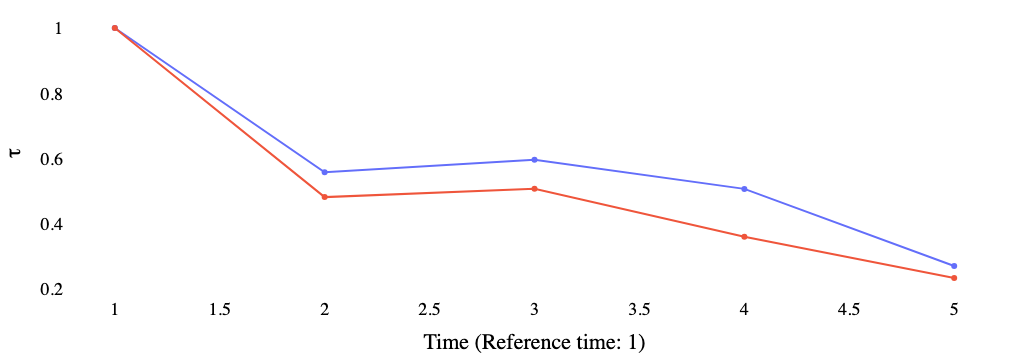

In [32]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=[i['Time_compared'] for i in tau_df_mean], 
                         y=[i['tau'] for i in tau_df_mean], mode='lines+markers', name='Mean Rankings'))
fig.add_trace(go.Scatter(x=[i['Time_compared'] for i in tau_df_median],
                         y=[i['tau'] for i in tau_df_median], mode='lines+markers', name='Median Rankings'))

fig.update_layout(
    xaxis_title='Time (Reference time: 1)',
    yaxis_title = '&#964;',
    plot_bgcolor='rgba(0,0,0,0)',
    font_family="Times",
    font_size = 18,
    font_color = 'black',
    margin=dict(l=10, r=10, t=10, b=10),
    showlegend=False
)

fig.show()

In [42]:
cal_ranking.groupby(['gendeath']).nid.nunique()

gendeath
1.0    88
2.0    88
3.0    88
4.0    88
5.0    88
Name: nid, dtype: int64

# Figure 8. Transmissions in wealth rankings between fathers and children.
## Note on Kendall's Tau
For Kendall's tau, we need to have the same length of the dataset at each period. We can compare two periods with `df2`, but then we'll have to break down the data differently.

In [33]:
df2_filtered = df2.dropna(subset=['lnwc_new2', 'lnwf_new2', 'gendeath'])

In [34]:
corr_df2 = []
for i in range(0, 5):
    subset = df2_filtered[df2_filtered['gendeath'] == i]
    tau, pval = kendalltau(subset['lnwc_new2'], subset['lnwf_new2']) 
    corr_df2.append({'Time_Child': i, 'tau': tau, 'pval': pval})
corr_df2 = pd.DataFrame(corr_df2)

In [35]:
corr_df2

,Time_Child,tau,pval
0,0,0.291317,4.678947e-11
1,1,0.398053,2.037387e-70
2,2,0.355893,1.334268e-131
3,3,0.299304,2.756456e-50
4,4,0.242540,1.364124e-13


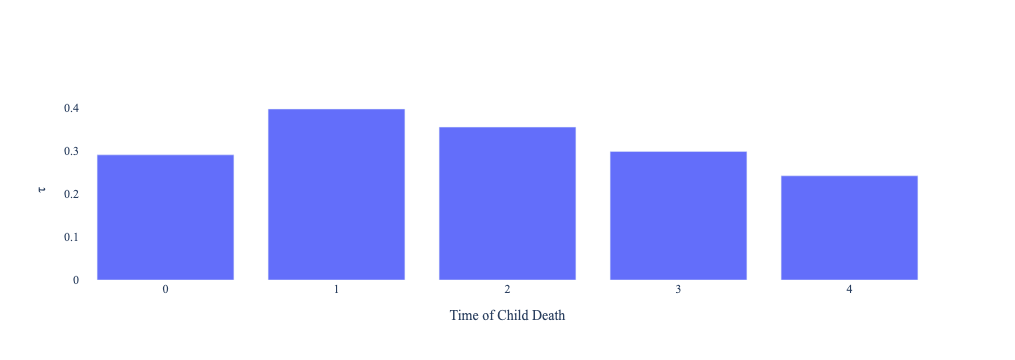

In [36]:
fig = go.Figure()
fig.add_trace(go.Bar(x=corr_df2['Time_Child'], y=corr_df2['tau']))
              
fig.update_layout(
    xaxis_title='Time of Child Death',
    yaxis_title ='&#964;',
    font_family="Times New Roman",
    plot_bgcolor='rgba(0,0,0,0)',
)

In [37]:
df2_filtered = df2_filtered.sort_values(by=['gendeath', 'lnwc_new2']).reset_index(drop=True)
df2_filtered['ranking_child'] = df2_filtered.groupby(['gendeath'])['lnwc_new2'].rank(ascending=False, method='first')
df2_filtered = df2_filtered.sort_values(by=['gendeath', 'lnwf_new2']).reset_index(drop=True)
df2_filtered['ranking_father'] = df2_filtered.groupby(['gendeath'])['lnwf_new2'].rank(ascending=False, method='first')
df2_filtered

,rare_master_death_id,father_rare_master_death_id,dfem,father_dprob,lnwc_new2,lnwf_new2,lnwgf_new2,lnwggf_new2,gendeath,ranking_child,ranking_father
0,10070,999031,1.0,0.0,0.69,-1.85,NaN,NaN,0.0,140.0,241.0
1,9593,8400,0.0,0.0,-0.76,-1.09,NaN,NaN,0.0,220.0,239.0
2,16653,20549,1.0,0.0,3.45,-1.09,NaN,NaN,0.0,123.0,240.0
3,7231,999814,0.0,0.0,-0.76,-0.93,-0.67,NaN,0.0,232.0,238.0
4,23209,12207,1.0,0.0,-0.76,-0.83,NaN,NaN,0.0,208.0,229.0
...,...,...,...,...,...,...,...,...,...,...,...
4947,13605,19347,0.0,1.0,4.88,6.42,NaN,9.43,4.0,12.0,5.0
4948,17192,26290,0.0,1.0,5.58,6.65,8.24,NaN,4.0,8.0,4.0
4949,11437,19731,1.0,1.0,6.34,6.81,-0.83,9.43,4.0,3.0,3.0
4950,28233,19549,0.0,1.0,3.70,7.34,NaN,NaN,4.0,46.0,2.0


In [38]:
subset.isna().sum()

rare_master_death_id             0
father_rare_master_death_id      0
dfem                             0
father_dprob                     0
lnwc_new2                        0
lnwf_new2                        0
lnwgf_new2                     184
lnwggf_new2                    285
gendeath                         0
dtype: int64

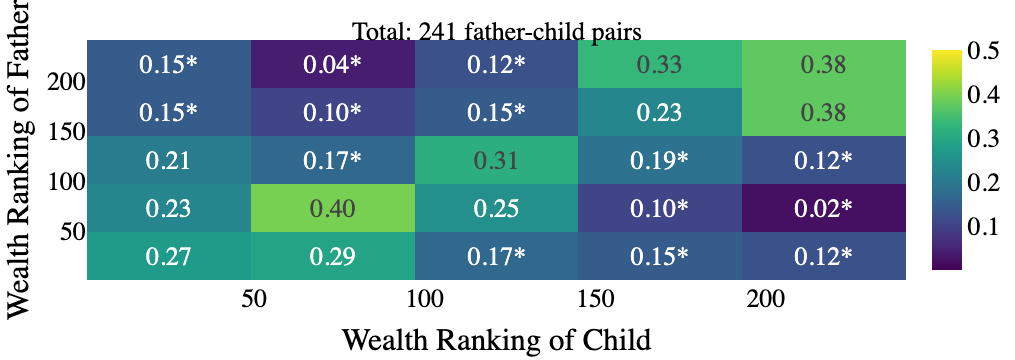

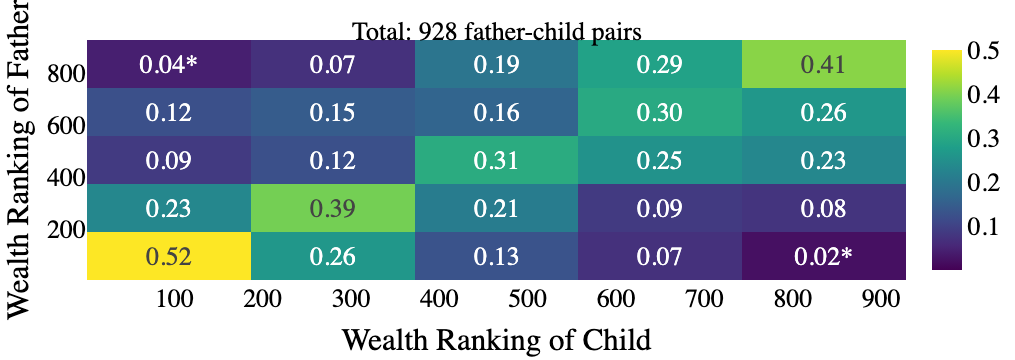

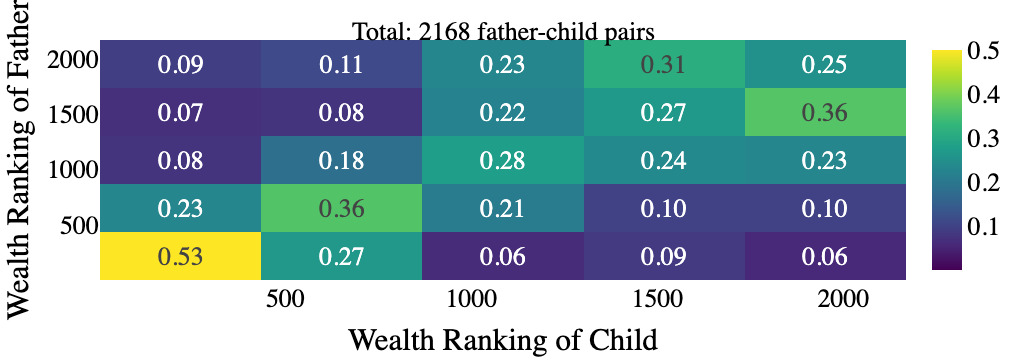

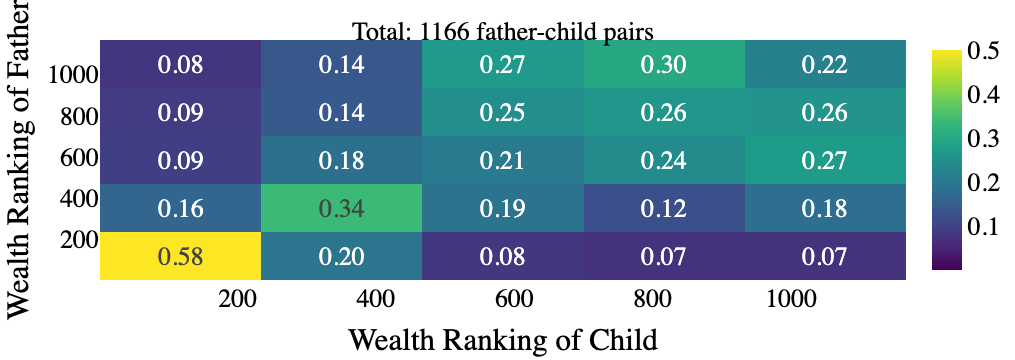

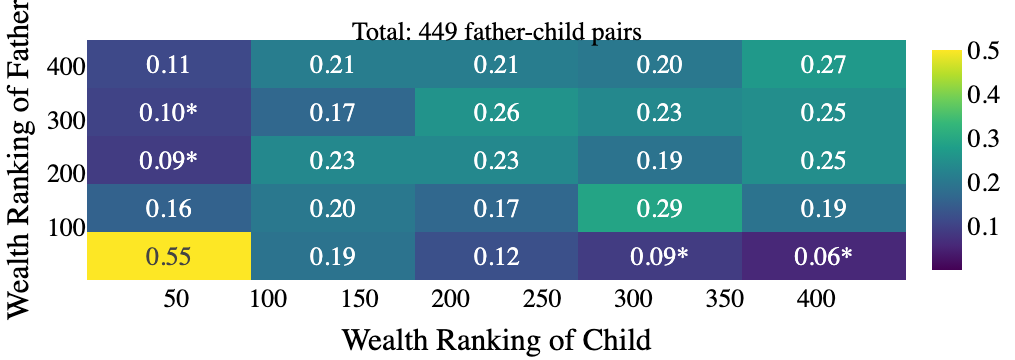

In [40]:
for i in range(0, 5):
    subset = df2_filtered[df2_filtered['gendeath'] == i].copy()
    fig = go.Figure()
    
    # Calculate 2D histogram manually to get z values
    x_bins = np.linspace(subset['ranking_child'].min(), subset['ranking_child'].max(), 6)  # Adjust bin size
    y_bins = np.linspace(subset['ranking_father'].min(), subset['ranking_father'].max(), 6)
    hist, x_edges, y_edges = np.histogram2d(subset['ranking_child'], subset['ranking_father'], bins=[x_bins, y_bins])
    
    # Calculate sample size for each bin
    bin_counts = hist.astype(int)
    
    # Create asterisks where sample size < 10
    asterisks = np.where(bin_counts < 10, '*', '')
    
    x_bin_widths = np.diff(x_edges)
    z_values = hist / x_bin_widths[:, None]  # Divide each bin count by its width
    
    # Flatten x and y edges for Plotly's input
    x_centers = 0.5 * (x_edges[:-1] + x_edges[1:])
    y_centers = 0.5 * (y_edges[:-1] + y_edges[1:])
    
    # Generate text annotations including asterisks
    text_values = np.array([
        [f"{z:.2f}{asterisks[j, k]}" for k, z in enumerate(row)] 
        for j, row in enumerate(z_values)
    ])
    
    fig.add_trace(
        go.Heatmap(
            x=x_centers,
            y=y_centers,
            z=z_values,
            zmin=0,
            zmax=0.5,
            colorscale='Viridis',
            colorbar=dict(tickvals=[0.1, 0.2, 0.3, 0.4, 0.5], ticktext=['0.1', '0.2', '0.3', '0.4', '0.5']),
            text=text_values,  # Add text annotations
            texttemplate="%{text}",  # Display text with asterisks
            hovertemplate="sqrt(Frequency): %{z:.2f}<extra></extra>"
        )
    )
    fig.update_layout(
        plot_bgcolor='rgba(0,0,0,0)',
        xaxis_title = 'Wealth Ranking of Child',
        yaxis_title = 'Wealth Ranking of Father',
        font_family="Times",
        font_size = 26 ,
        font_color = 'black',
        margin=dict(l=10, r=10, t=40, b=10),
        )
    fig.add_annotation(
        x=0.5,
        y=1.11,
        xref='paper',
        yref='paper',
        text=f'Total: {len(subset)} father-child pairs',
        showarrow=False,
        align='center'
    )
    
    fig.show()
    # fig.write_image(f'img/heatmap_df2_period{i}.svg')